In [5]:
import pandas as pd
import matplotlib.pyplot as plt

s_frame = pd.read_csv("suicide.csv")
print('s_frame(row, col) =', s_frame.shape)
s_frame.head(5) # Print the first 9 entries.

s_frame(row, col) = (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<AxesSubplot:title={'center':'Male Suicide Numbers'}, xlabel='year'>

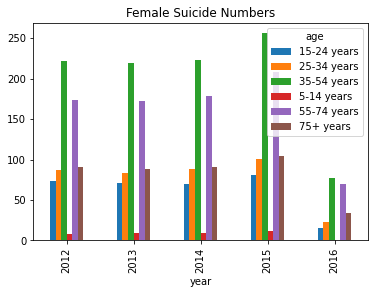

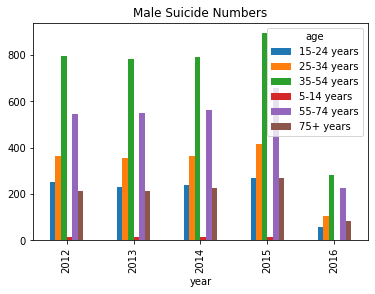

In [4]:
data = s_frame[['country', 'year', 'sex', 'age', 'suicides_no', 'population']]
data = data[(data['year'] >= 2012) & (data['year'] <= 2016)]

# Female vs Male
fdat = data[data['sex'] == 'female']
mdat = data[data['sex'] == 'male']

fdat = fdat.pivot_table(index='year', columns='age', values='suicides_no')
mdat = mdat.pivot_table(index='year', columns='age', values='suicides_no')

fdat.plot.bar(title='Female Suicide Numbers')
mdat.plot.bar(title='Male Suicide Numbers')

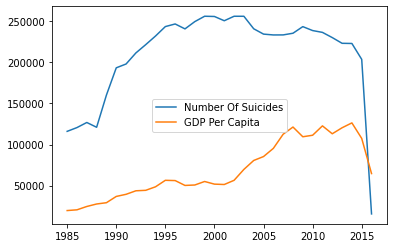

In [9]:
data = s_frame[['country', 'year', 'suicides_no']]
data2 = s_frame[['country', 'year', 'suicides_no', 'gdp_per_capita ($)']]
del data['country']
del data2['suicides_no']
del data2['country']

data = data.groupby('year').sum()
data2 = data2.groupby('year').max()

plt.plot(data, label='Number Of Suicides')
plt.plot(data2, label='GDP Per Capita')
plt.legend()
plt.show()